In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from colour import wavelength_to_XYZ

In [2]:
from chromalab.observer import Observer, Cone, transformToChromaticity, getSampledHyperCube, getSampledHyperCubeSurface
from chromalab.spectra import Illuminant

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [64]:
## plotting functionality
def plotTrichromat(points, rgbs=None, alpha=0.5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if rgbs is None:
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=100, alpha=alpha)
    else:
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=rgbs, s=100, alpha=alpha)
    ax.set_xlabel('S')
    ax.set_ylabel('M')
    ax.set_zlabel('L')
    plt.show()

def plotTetrachromat(points, rgbs=None, alpha=0.5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    chrom_pts = transformToChromaticity(points)
    if rgbs is None:
        ax.scatter(chrom_pts[:, 0], chrom_pts[:, 1], chrom_pts[:, 2], s=50, alpha=alpha)
    else:
        ax.scatter(chrom_pts[:, 0], chrom_pts[:, 1], chrom_pts[:, 2], c=rgbs, s=50, alpha=alpha)
    ax.set_xlabel('G1')
    ax.set_ylabel('G2')
    ax.set_zlabel('G3')
    plt.show()

### Define Wavelength Sampling

In [5]:
wavelengths = np.arange(390, 830, 10)
d65 = Illuminant.get("E")

### Trichromat Sampling

In [53]:
trichromat = Observer.trichromat(wavelengths=wavelengths, illuminant=d65) 
LMS, rgbs = trichromat.get_full_colors_in_activations()

100%|██████████| 1160/1160 [00:02<00:00, 400.35it/s]


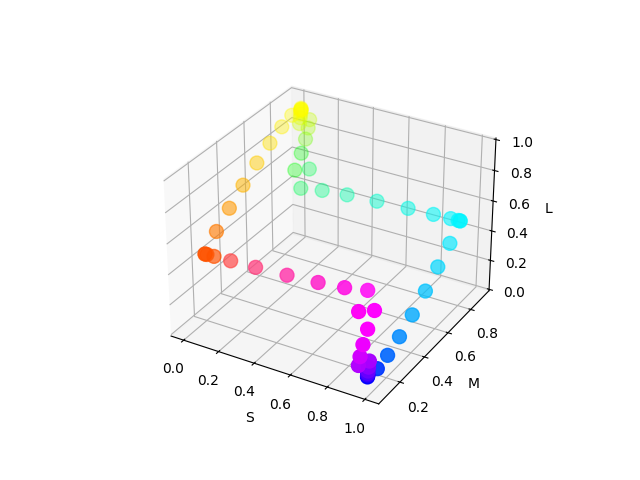

In [54]:
plotTrichromat(LMS, rgbs)

### Trichromat Sampling with Oz

In [55]:
LMS = getSampledHyperCube(0.05, 3)
LMS_Boundary = getSampledHyperCubeSurface(0.05, 3)

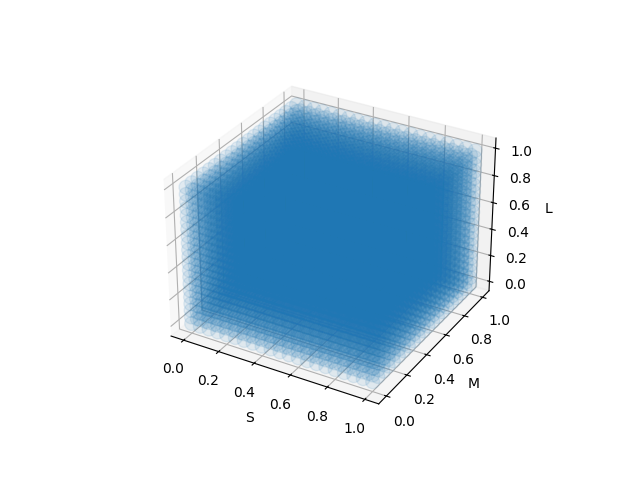

In [58]:
plotTrichromat(LMS, alpha=0.1)

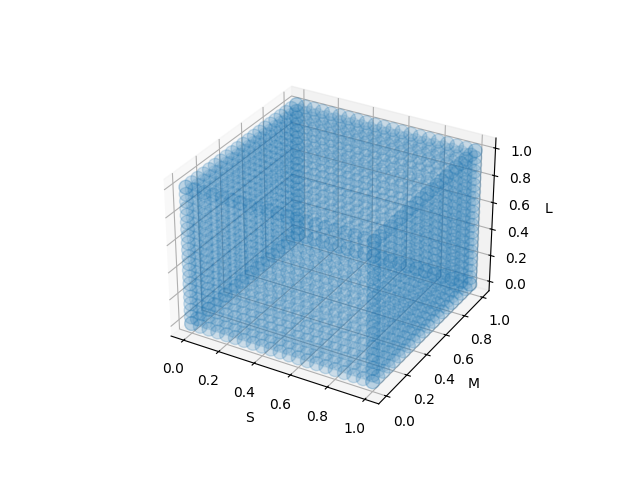

In [57]:
plotTrichromat(LMS_Boundary, alpha=0.1)

### Human Tetrachromat Sampling

In [59]:
tetrachromat = Observer.tetrachromat(wavelengths=wavelengths, illuminant=d65, verbose=True)
smql, rgbs = tetrachromat.get_full_colors_in_activations()

100%|██████████| 26488/26488 [01:13<00:00, 359.86it/s]


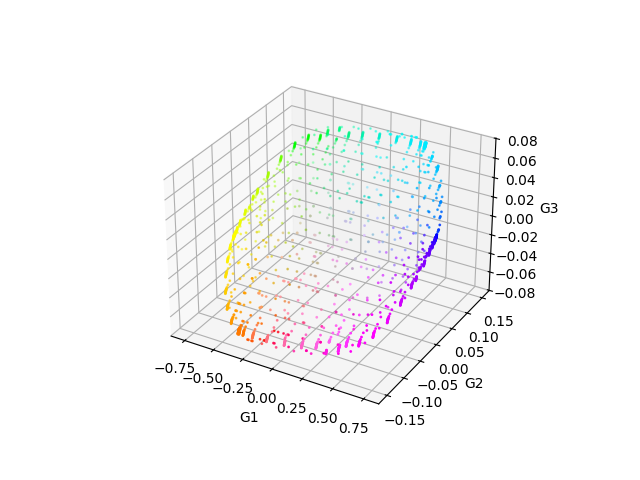

In [60]:
plotTetrachromat(smql, rgbs)

### Pigeon Tetrachromat Sampling

In [62]:
pigeon_cone_human = Observer.human_w_pigeon_cone(wavelengths=wavelengths, illuminant=d65, verbose=True)
smpl, rgbs = pigeon_cone_human.get_full_colors_in_activations()

100%|██████████| 26488/26488 [01:13<00:00, 360.09it/s]


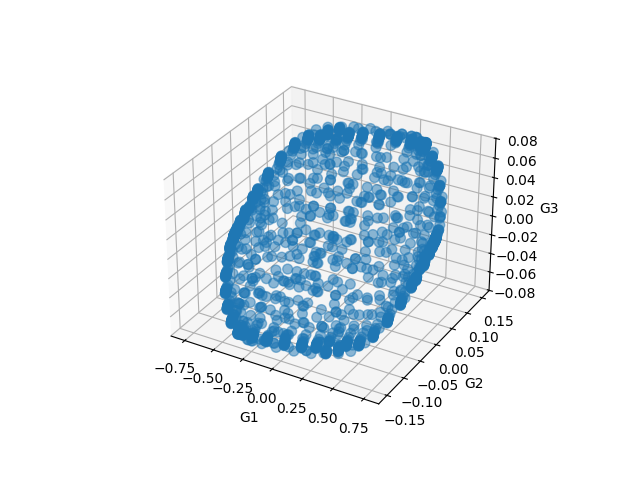

In [66]:
plotTetrachromat(smql)

### Oz Tetrachromat Sampling

In [67]:
SMQL = getSampledHyperCube(0.1, 4)
SMQL_Boundary = getSampledHyperCubeSurface(0.1, 4)

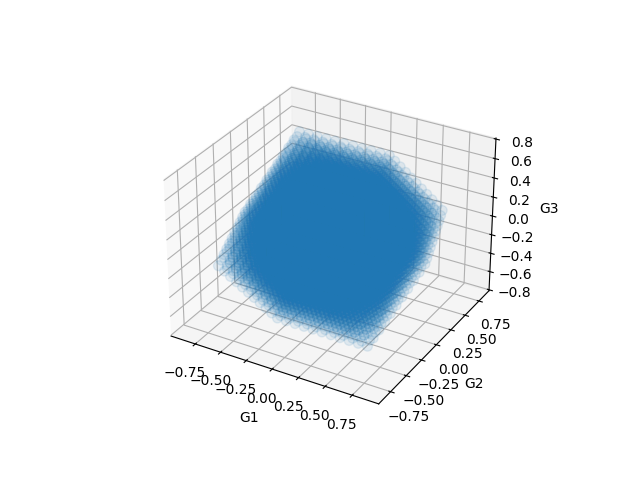

In [72]:
plotTetrachromat(SMQL, alpha=0.1)

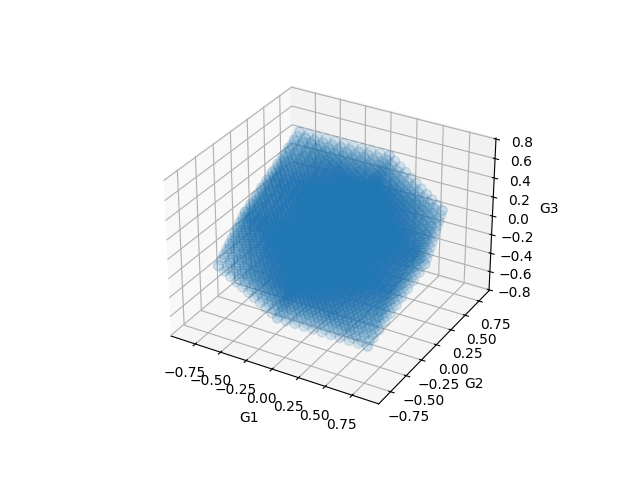

In [73]:
plotTetrachromat(SMQL_Boundary, alpha=0.05)